In [1]:
import numpy as np
import pandas as pd

In [2]:
df_cleaned = pd.read_csv('../data/cleaned_data_saudi_used_cars.csv')
df_cleaned.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price,Mileage_per_Year,Unnatural_High_Mileage_Flag
0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000,10000.000000,False
1,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000,20000.000000,False
2,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000,31428.571429,False
3,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000,8333.333333,False
4,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000,18900.000000,False


# Features Creation

In [3]:
df_engineered = df_cleaned.copy()

In [4]:
CURRENT_YEAR = 2022
df_engineered['Car_Age'] = CURRENT_YEAR - df_engineered['Year']
df_engineered.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price,Mileage_per_Year,Unnatural_High_Mileage_Flag,Car_Age
0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000,10000.000000,False,8
1,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000,20000.000000,False,7
2,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000,31428.571429,False,7
3,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000,8333.333333,False,3
4,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000,18900.000000,False,10


In [5]:
df_engineered['IsVintage'] = (df_engineered['Year'] < 2000).astype(int)
df_engineered.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price,Mileage_per_Year,Unnatural_High_Mileage_Flag,Car_Age,IsVintage
0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000,10000.000000,False,8,0
1,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000,20000.000000,False,7,0
2,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000,31428.571429,False,7,0
3,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000,8333.333333,False,3,0
4,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000,18900.000000,False,10,0


In [6]:
df_engineered['IsBigEngine'] = (df_engineered['Engine_Size'] > 7.0).astype(int)
df_engineered.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price,Mileage_per_Year,Unnatural_High_Mileage_Flag,Car_Age,IsVintage,IsBigEngine
0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000,10000.000000,False,8,0,1
1,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000,20000.000000,False,7,0,0
2,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000,31428.571429,False,7,0,0
3,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000,8333.333333,False,3,0,0
4,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000,18900.000000,False,10,0,0


# Feature Selection

In [7]:
df_engineered = df_engineered.drop(columns=['Negotiable', 'Mileage_per_Year', 'Unnatural_High_Mileage_Flag', 'Year'])
df_engineered.head()

,Type,Region,Make,Gear_Type,Origin,Options,Engine_Size,Mileage,Price,Car_Age,IsVintage,IsBigEngine
0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,8.0,80000,120000,8,0,1
1,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,5.0,140000,260000,7,0,0
2,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2.4,220000,42000,7,0,0
3,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2.0,25000,58000,3,0,0
4,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,4.8,189000,85000,10,0,0


Feature importance (to-do later)

# Features Transformation

In [8]:
df_engineered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3801 entries, 0 to 3800
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3801 non-null   object 
 1   Region       3801 non-null   object 
 2   Make         3801 non-null   object 
 3   Gear_Type    3801 non-null   object 
 4   Origin       3801 non-null   object 
 5   Options      3801 non-null   object 
 6   Engine_Size  3801 non-null   float64
 7   Mileage      3801 non-null   int64  
 8   Price        3801 non-null   int64  
 9   Car_Age      3801 non-null   int64  
 10  IsVintage    3801 non-null   int32  
 11  IsBigEngine  3801 non-null   int32  
dtypes: float64(1), int32(2), int64(3), object(6)
memory usage: 326.8+ KB


In [9]:
TARGET_VAR = 'Price'
df_engineered['IsVintage']   = df_engineered['IsVintage'].astype('bool')
df_engineered['IsBigEngine'] = df_engineered['IsBigEngine'].astype('bool')

cat_cols = (
    df_engineered
      .select_dtypes(include=['object','bool','category'])
      .columns
      .tolist()
)

num_cols = (
    df_engineered
      .select_dtypes(include=['int64','float64'])
      .drop(columns=[TARGET_VAR])
      .columns
      .tolist()
)

# detect highly-skewed numerics for log1p transform
skewed_cols = [c for c in num_cols if abs(df_engineered[c].skew()) > 1.0]
num_plain = [c for c in num_cols if c not in skewed_cols]

print("Categorical variables:", cat_cols)
print("Numerical variables:", num_cols)
print("Highly skewed variables:", skewed_cols)
print("Target variable:", TARGET_VAR)

Categorical variables: ['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options', 'IsVintage', 'IsBigEngine']
Numerical variables: ['Engine_Size', 'Mileage', 'Car_Age']
Highly skewed variables: ['Mileage', 'Car_Age']
Target variable: Price


In [10]:
print("\n>> category cardinalities:")
for c in cat_cols:
    print(f"   {c:12s}: {df_engineered[c].nunique()} categories")


>> category cardinalities:
   Type        : 319 categories
   Region      : 27 categories
   Make        : 56 categories
   Gear_Type   : 2 categories
   Origin      : 4 categories
   Options     : 3 categories
   IsVintage   : 2 categories
   IsBigEngine : 2 categories


In [11]:
# split them into "low-cardinality" vs "high-cardinality"
LOW_CARD_THRESH = 10
low_card_cat  = [c for c in cat_cols if df_engineered[c].nunique() <= LOW_CARD_THRESH]
high_card_cat = [c for c in cat_cols if df_engineered[c].nunique() >  LOW_CARD_THRESH]

In [12]:
# a quick sanity check
print("\n>> low-cardinal cats:",  low_card_cat)
print(">> high-cardinal cats:", high_card_cat)
print(">> numeric cols:     ",  num_cols)
print(">> skewed cols:     ",  skewed_cols)


>> low-cardinal cats: ['Gear_Type', 'Origin', 'Options', 'IsVintage', 'IsBigEngine']
>> high-cardinal cats: ['Type', 'Region', 'Make']
>> numeric cols:      ['Engine_Size', 'Mileage', 'Car_Age']
>> skewed cols:      ['Mileage', 'Car_Age']


Pipeline for Feature Engineering

In [13]:
# from sklearn.base import BaseEstimator, TransformerMixin

# CURRENT_YEAR = 2022

# class FeatureEngineer(BaseEstimator, TransformerMixin):
#     def __init__(self, current_year=CURRENT_YEAR):
#         self.current_year = current_year

#     def fit(self, X, y=None):
#         # nothing to learn
#         return self

#     def transform(self, X):
#         # take a DataFrame (raw CSV) and return engineered DataFrame
#         df = X.copy()

#         # 1) Car age
#         df["Car_Age"] = self.current_year - df["Year"]

#         # 2) Vintage flag
#         df["IsVintage"] = (df["Year"] < 2000).astype("bool")

#         # 3) Big engine flag ( >7L )
#         df["IsBigEngine"] = (df["Engine_Size"] > 7.0).astype("bool")

#         # 4) drop unused
#         df = df.drop(columns=["Negotiable", "Mileage_per_Year", 
#                               "Unnatural_High_Mileage_Flag", "Year"],
#                      errors="ignore")

#         return df

The code for feature engineering above has been moved to `custom_pipeline_utils.py` to allow the model's joblib file to be accessible from other files.

To use it, simply import it below.

In [14]:
from custom_pipeline_utils import FeatureEngineer

In [46]:
import os
print(os.getcwd())

c:\Users\User\Desktop\PARA\1 Projects\DTI data science & machine learning\1 Machine Learning Module\Saudi Arabia Used Cars\code_files


# Modeling

In [16]:
# ============================================================================
# 0) Imports & data split
# ============================================================================
from sklearn.model_selection    import train_test_split, KFold, cross_validate, RandomizedSearchCV
from sklearn.compose            import ColumnTransformer
from sklearn.preprocessing      import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline           import Pipeline
from sklearn.linear_model       import ElasticNetCV
from sklearn.ensemble           import RandomForestRegressor
from sklearn.metrics            import make_scorer, mean_absolute_percentage_error
from sklearn.compose            import TransformedTargetRegressor
import category_encoders as ce
from xgboost import XGBRegressor

RANDOM_STATE = 21
TARGET       = "Price"

X = df_cleaned.drop(columns=TARGET)
y = df_cleaned[TARGET]

# keep 20 % hold-out for the very end
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=RANDOM_STATE, stratify=None
)

In [48]:
import numpy as np, pandas as pd
from sklearn.pipeline      import Pipeline
from sklearn.compose       import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.base          import BaseEstimator, TransformerMixin
import category_encoders as ce

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error

# # ——————————————————————————————————————————
# # Column buckets
# # ——————————————————————————————————————————
# LOW_CARD_THRESH = 10

# # ------------------------------------------------------------------
# # Helper callables --------------------------------------------------
# # Each callable receives the *original* DataFrame after FeatureEngineer
# # and returns the list of cols for that transformer.
# # ------------------------------------------------------------------
# def low_card_cols(df):
#     cats = df.select_dtypes(['object', 'category', 'bool'])
#     return [c for c in cats.columns if cats[c].nunique() <= LOW_CARD_THRESH]

# def high_card_cols(df):
#     cats = df.select_dtypes(['object', 'category', 'bool'])
#     return [c for c in cats.columns if cats[c].nunique() > LOW_CARD_THRESH]

# def skewed_cols(df):
#     nums = df.select_dtypes(include=['int64', 'float64'])
#     # exclude target if still there
#     if 'Price' in nums.columns:
#         nums = nums.drop(columns='Price')
#     return [c for c in nums.columns if abs(nums[c].skew()) > 1.0]

# def num_plain_cols(df):
#     nums = df.select_dtypes(include=['int64', 'float64'])
#     if 'Price' in nums.columns:
#         nums = nums.drop(columns='Price')
#     return [c for c in nums.columns if abs(nums[c].skew()) <= 1.0]

# # ------------------------------------------------------------------
# # ColumnTransformer that uses those callables
# # ------------------------------------------------------------------
# preproc = ColumnTransformer(
#     transformers=[
#         ("low", OneHotEncoder(drop="first", handle_unknown="ignore"), low_card_cols),
#         ("bin", ce.BinaryEncoder(),                                   high_card_cols),
#         ("num", StandardScaler(),                                     num_plain_cols),
#         ("log", Pipeline([
#                     ("l", FunctionTransformer(np.log1p, feature_names_out="one-to-one")),
#                     ("s", StandardScaler())
#                 ]),
#                 skewed_cols),
#     ],
#     remainder="drop",
#     verbose_feature_names_out=False
# )

preproc = ColumnTransformer(
    transformers=[
        ("low", OneHotEncoder(drop="first", handle_unknown="ignore"), low_card_cat),
        ("bin", ce.BinaryEncoder(),                                   high_card_cat),
        ("num", StandardScaler(),                                     num_plain),
        ("log", Pipeline([
                    ("l", FunctionTransformer(np.log1p, feature_names_out="one-to-one")),
                    ("s", StandardScaler())]),                        skewed_cols),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

In [49]:

# ——————————————————————————————————————————
# Models (default params, random_state only)
# ——————————————————————————————————————————
from sklearn.linear_model      import ElasticNet
from sklearn.neighbors         import KNeighborsRegressor
from sklearn.tree              import DecisionTreeRegressor
from sklearn.ensemble          import RandomForestRegressor
from xgboost                   import XGBRegressor
from lightgbm                  import LGBMRegressor
from catboost                  import CatBoostRegressor
from sklearn.compose           import TransformedTargetRegressor

models = {
    "ElasticNet":   ElasticNet(random_state=RANDOM_STATE),
    "KNN":          KNeighborsRegressor(),
    "DecisionTree": DecisionTreeRegressor(random_state=RANDOM_STATE),
    "RandomForest": RandomForestRegressor(random_state=RANDOM_STATE),
    "XGB":          XGBRegressor(random_state=RANDOM_STATE, verbosity=0),
    "LightGBM":     LGBMRegressor(random_state=RANDOM_STATE, verbose=-1),
    "CatBoost":     CatBoostRegressor(random_state=RANDOM_STATE,
                                      logging_level="Silent")
}

cv   = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
scor = {"MAE":"neg_mean_absolute_error",
        "MAPE":"neg_mean_absolute_percentage_error",
        "RMSE":"neg_root_mean_squared_error"}

results = []
for name, base_model in models.items():
    pipe = Pipeline([
        ("fe", FeatureEngineer(current_year=2022)),
        ("prep",  preproc),
        ("model", TransformedTargetRegressor(
                     base_model,
                     func=np.log1p, inverse_func=np.expm1))
    ])
    row = {"Model": name}
    for m, scr in scor.items():
        row[m] = -cross_val_score(pipe, X_train, y_train,
                                  cv=cv, scoring=scr).mean()
    results.append(row)

pd.DataFrame(results).sort_values("MAE").reset_index(drop=True)

d:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid 

,Model,MAE,MAPE,RMSE
0,CatBoost,18626.780485,0.717870,37335.691148
1,RandomForest,19413.615723,0.802552,40151.424533
2,LightGBM,20146.114744,0.774080,38834.782576
3,XGB,20355.334766,0.724933,39948.325781
4,KNN,21100.427675,0.899226,41214.561339
5,DecisionTree,25942.595994,1.011526,52531.502361
6,ElasticNet,44501.567143,1.234947,76888.907080


In [50]:
# def show_final_columns(pipe):
#     fe_df = FeatureEngineer().transform(X_train)  # replicate engineered sample
#     cols  = {name: sel(fe_df) for name, sel in
#              [("low" , low_card_cols),
#               ("high", high_card_cols),
#               ("num" , num_plain_cols),
#               ("skew", skewed_cols)]}
#     for k, v in cols.items():
#         print(f"{k:5s}: {v}")

# show_final_columns(pipe)

In [51]:
# Best pipeline
best_pipe = Pipeline([
    ("fe", FeatureEngineer(current_year=2022)),
    ("prep",  preproc),
    ("model", TransformedTargetRegressor(
        CatBoostRegressor(random_state=RANDOM_STATE, logging_level="Silent"),
        func=np.log1p, inverse_func=np.expm1))
])

# Fit on train
best_pipe.fit(X_train, y_train)

# Predict on test set
y_pred = best_pipe.predict(X_test)

df_eval = pd.DataFrame({
    "y_true": y_test,
    "y_pred": y_pred
}).reset_index(drop=True)

In [52]:
bins = [0, 10000, 35000, 60000, 95000, 300000, np.inf]  # Add an upper limit for 300k+ 
labels = ["0–10k", "10k–35k", "35k–60k", "60k–95k", "95k–300k", "300k+"]  # Add an upper limit for 300k+
df_eval["price_band"] = pd.cut(df_eval["y_true"], bins=bins, labels=labels)

In [53]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

band_stats = (
    df_eval
    .groupby("price_band")
    .apply(lambda g: pd.Series({
        "count": len(g),
        "MAE": np.mean(np.abs(g.y_true - g.y_pred)),
        "MAPE": mape(g.y_true, g.y_pred)
    }))
)
display(band_stats)

C:\Users\User\AppData\Local\Temp\ipykernel_12780\1779149513.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("price_band")
C:\Users\User\AppData\Local\Temp\ipykernel_12780\1779149513.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


,count,MAE,MAPE
price_band,,,
0–10k,29.0,30352.917255,16.500007
10k–35k,186.0,5933.276576,0.261816
35k–60k,213.0,10020.295791,0.214423
60k–95k,172.0,15250.568379,0.201256
95k–300k,151.0,31573.013825,0.205957
300k+,10.0,149650.931067,0.299643


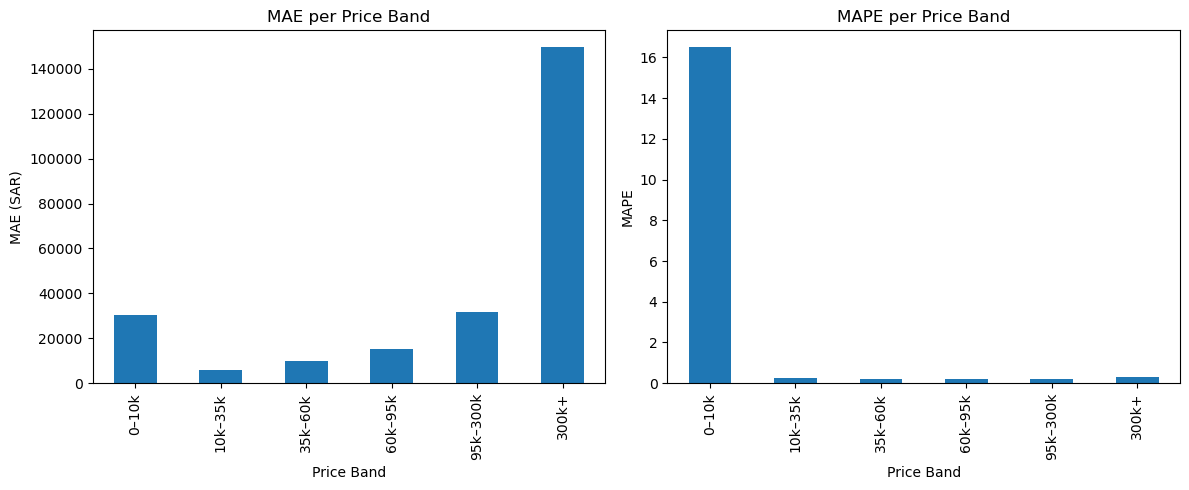

In [54]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

band_stats["MAE"].plot(kind="bar", ax=ax[0], title="MAE per Price Band")
ax[0].set_ylabel("MAE (SAR)")
ax[0].set_xlabel("Price Band")

band_stats["MAPE"].plot(kind="bar", ax=ax[1], title="MAPE per Price Band")
ax[1].set_ylabel("MAPE")
ax[1].set_xlabel("Price Band")

plt.tight_layout()
plt.show()

In [55]:
bands_to_show = ["0–10k", "35k–60k", "95k–300k", "300k+"]
examples = []

for band in bands_to_show:
    band_examples = df_eval[df_eval["price_band"] == band]
    if len(band_examples) > 0:
        # Get 1 example from this price band
        example_idx = band_examples.index[5]
        
        # Get the original index in X_test
        row_idx = X_test.index[example_idx]
        row = X_test.loc[row_idx]
        
        # Get the true price and prediction
        true_price = y_test.loc[row_idx]
        pred = df_eval.loc[example_idx, 'y_pred']
        
        examples.append((band, row, true_price, pred))

for band, row, true_price, pred in examples:
    print(f"\n=== Price Band: {band} ===")
    print("Data row:")
    display(row.to_frame().T)
    print(f"True Price: {true_price}")
    print(f"Predicted Price: {pred:.2f}")


=== Price Band: 0–10k ===
Data row:


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Mileage_per_Year,Unnatural_High_Mileage_Flag
1151,Edge,Jeddah,Ford,Automatic,Saudi,Full,2014,3.6,99000,False,12375.0,False


True Price: 1500
Predicted Price: 68057.88

=== Price Band: 35k–60k ===
Data row:


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Mileage_per_Year,Unnatural_High_Mileage_Flag
3699,Fusion,Dammam,Ford,Automatic,Saudi,Semi Full,2015,2.5,157000,False,22428.571429,False


True Price: 47000
Predicted Price: 48301.50

=== Price Band: 95k–300k ===
Data row:


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Mileage_per_Year,Unnatural_High_Mileage_Flag
2500,Prado,Riyadh,Toyota,Automatic,Saudi,Semi Full,2016,4.0,201000,False,33500.0,False


True Price: 107000
Predicted Price: 103520.10

=== Price Band: 300k+ ===
Data row:


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Mileage_per_Year,Unnatural_High_Mileage_Flag
1170,Range Rover,Dammam,Land Rover,Automatic,Saudi,Full,2019,3.5,38000,False,12666.666667,False


True Price: 375000
Predicted Price: 273018.79


# Hyperparameter Tuning

Fitting 5 folds for each of 40 candidates, totalling 200 fits

──────────────── Best CV result ────────────────
MAE (CV): 17,419.20
Best params:
  model__regressor__bagging_temperature: 0.5247717281770795
  model__regressor__depth: 8
  model__regressor__iterations: 822
  model__regressor__l2_leaf_reg: 6.698800021385795
  model__regressor__learning_rate: 0.04769363704290679
  model__regressor__random_strength: 0.6147635745007861

─────────  Hold-out test  ─────────
MAE test : 15,492.51
MAPE test: 0.960


C:\Users\User\AppData\Local\Temp\ipykernel_12780\1238575932.py:77: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  band_tbl = df_eval.groupby("price_band").apply(agg_band)
C:\Users\User\AppData\Local\Temp\ipykernel_12780\1238575932.py:77: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  band_tbl = df_eval.groupby("price_band").apply(agg_band)


,count,MAE_mean,MAE_sd,MAPE_mean,MAPE_sd
price_band,,,,,
0–10k,29.0,35660.209285,34018.586444,20.149606,22.697918
10k–35k,186.0,5884.587247,6340.528951,0.254640,0.267460
35k–60k,213.0,9125.680172,12715.888890,0.197333,0.289260
60k–95k,172.0,12296.447140,12631.741045,0.162573,0.161736
95k–300k,151.0,27092.513947,30752.276902,0.169522,0.172573
300k+,10.0,151139.584254,155452.946756,0.315211,0.189022


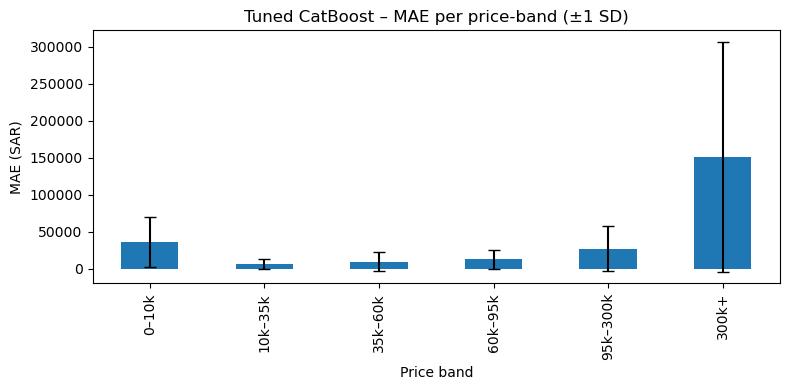

In [56]:
# ───────────────────────────────────────────────────────────────
# Hyper-parameter tuning – CatBoostRegressor
# ───────────────────────────────────────────────────────────────
from sklearn.model_selection import RandomizedSearchCV
from catboost                import CatBoostRegressor
from sklearn.compose         import TransformedTargetRegressor
from scipy.stats             import randint, uniform

# search space (broad but enough for CPU)
param_distr = {
    "model__regressor__iterations"        : randint(300, 1200),
    "model__regressor__depth"             : randint(4, 10),
    "model__regressor__learning_rate"     : uniform(0.01, 0.25),
    "model__regressor__l2_leaf_reg"       : uniform(1, 8),
    "model__regressor__bagging_temperature": uniform(0, 1),
    "model__regressor__random_strength"   : uniform(0, 1)
}

base_cat = CatBoostRegressor(
                random_state=RANDOM_STATE,
                loss_function="MAE",
                logging_level="Silent",
                grow_policy="Lossguide"  # faster on many-feature OHE data
            )

pipe_cat = Pipeline([
        ("fe", FeatureEngineer(current_year=2022)),
        ("prep",  preproc),
        ("model", TransformedTargetRegressor(
                      base_cat,
                      func=np.log1p, inverse_func=np.expm1))
])

search = RandomizedSearchCV(
            pipe_cat,
            param_distributions = param_distr,
            n_iter      = 40,
            cv          = cv,
            scoring     = "neg_mean_absolute_error",
            n_jobs      = -1,
            verbose     = 2,
            random_state= RANDOM_STATE)

search.fit(X_train, y_train)

print("\n──────────────── Best CV result ────────────────")
print(f"MAE (CV): {-search.best_score_:,.2f}")
print("Best params:")
for k, v in search.best_params_.items():
    print(f"  {k}: {v}")

# final model refit on *all* training data
best_model = search.best_estimator_
best_model.fit(X_train, y_train)

# hold-out test metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
y_pred = best_model.predict(X_test)
print("\n─────────  Hold-out test  ─────────")
print(f"MAE test : {mean_absolute_error(y_test, y_pred):,.2f}")
print(f"MAPE test: {mean_absolute_percentage_error(y_test, y_pred):.3f}")

# per-price-band diagnostics (mean ± sd)
df_eval = (pd.DataFrame({"y_true": y_test, "y_pred": y_pred})
             .reset_index(drop=True))
df_eval["price_band"] = pd.cut(df_eval.y_true, bins=bins, labels=labels)

def agg_band(df):
    ae   = np.abs(df.y_true - df.y_pred)
    ape  = np.abs((df.y_true - df.y_pred) / df.y_true)
    return pd.Series({
        "count"     : len(df),
        "MAE_mean"  : ae.mean(),  "MAE_sd"  : ae.std(ddof=0),
        "MAPE_mean" : ape.mean(), "MAPE_sd" : ape.std(ddof=0)
    })

band_tbl = df_eval.groupby("price_band").apply(agg_band)
display(band_tbl)

# optional quick bar-plot
ax = band_tbl["MAE_mean"].plot.bar(
        yerr=band_tbl["MAE_sd"], capsize=4,
        figsize=(8,4), title="Tuned CatBoost – MAE per price-band (±1 SD)")
ax.set_ylabel("MAE (SAR)"); ax.set_xlabel("Price band");
plt.tight_layout();


In [57]:
display(band_stats)
display(band_tbl)

,count,MAE,MAPE
price_band,,,
0–10k,29.0,30352.917255,16.500007
10k–35k,186.0,5933.276576,0.261816
35k–60k,213.0,10020.295791,0.214423
60k–95k,172.0,15250.568379,0.201256
95k–300k,151.0,31573.013825,0.205957
300k+,10.0,149650.931067,0.299643


,count,MAE_mean,MAE_sd,MAPE_mean,MAPE_sd
price_band,,,,,
0–10k,29.0,35660.209285,34018.586444,20.149606,22.697918
10k–35k,186.0,5884.587247,6340.528951,0.254640,0.267460
35k–60k,213.0,9125.680172,12715.888890,0.197333,0.289260
60k–95k,172.0,12296.447140,12631.741045,0.162573,0.161736
95k–300k,151.0,27092.513947,30752.276902,0.169522,0.172573
300k+,10.0,151139.584254,155452.946756,0.315211,0.189022


In [58]:
global_mae  = (band_stats["MAE"]  * band_stats["count"]).sum() / band_stats["count"].sum()
global_mape = (band_stats["MAPE"] * band_stats["count"]).sum() / band_stats["count"].sum()

print(f"Global MAE : {global_mae:,.2f}")
print(f"Global MAPE: {global_mape:,.4f}")

Global MAE : 17,089.72
Global MAPE: 0.8431


In [59]:
# Filter the bands to exclude 0-10k and 300k+
filtered_bands = band_tbl[(band_tbl.index != "0–10k") & (band_tbl.index != "300k+")]

# Calculate global metrics on the filtered data
filtered_global_mae = (filtered_bands["MAE_mean"] * filtered_bands["count"]).sum() / filtered_bands["count"].sum()
filtered_global_mape = (filtered_bands["MAPE_mean"] * filtered_bands["count"]).sum() / filtered_bands["count"].sum()
filtered_global_mae_sd = (filtered_bands["MAE_sd"] * filtered_bands["count"]).sum() / filtered_bands["count"].sum()
filtered_global_mape_sd = (filtered_bands["MAPE_sd"] * filtered_bands["count"]).sum() / filtered_bands["count"].sum()

# Calculate metrics for all bands for comparison
global_mae = (band_tbl["MAE_mean"] * band_tbl["count"]).sum() / band_tbl["count"].sum()
global_mape = (band_tbl["MAPE_mean"] * band_tbl["count"]).sum() / band_tbl["count"].sum()
global_mae_sd = (band_tbl["MAE_sd"] * band_tbl["count"]).sum() / band_tbl["count"].sum()

# Print results
print(f"All price bands:")
print(f"  Global MAE : {global_mae:,.2f}")
print(f"  Global MAPE: {global_mape:.4f}")
print(f"  Global MAE SD: {global_mae_sd:,.2f}")

print(f"\nExcluding extreme price bands (0-10k and 300k+):")
print(f"  Global MAE : {filtered_global_mae:,.2f}")
print(f"  Global MAPE: {filtered_global_mape:.4f}")
print(f"  Global MAE SD: {filtered_global_mae_sd:,.2f}")
print(f"  Global MAPE SD: {filtered_global_mape_sd:.4f}")

All price bands:
  Global MAE : 15,492.51
  Global MAPE: 0.9599
  Global MAE SD: 17,404.92

Excluding extreme price bands (0-10k and 300k+):
  Global MAE : 12,803.69
  Global MAPE: 0.1980
  Global MAE SD: 14,825.59
  Global MAPE SD: 0.2289


In [60]:
# ───────────────────────────────────────────────────────────────
#  SAVE the tuned CatBoost pipeline
#  – already fitted on X_train  (80 % of the data)
#  – X_test / y_test were used only for metrics, not for .fit()
# ───────────────────────────────────────────────────────────────
from pathlib import Path
from joblib  import dump

Path("../models").mkdir(parents=True, exist_ok=True)

dump(best_model,
     "../models/catboost_price_pipe.joblib",
     compress=("xz", 3))          # small file, fast load

print("Tuned CatBoost pipeline saved to  ../models/catboost_price_pipe.joblib")

Tuned CatBoost pipeline saved to  ../models/catboost_price_pipe.joblib


In [61]:
examples = []

for band in bands_to_show:
    band_examples = df_eval[df_eval["price_band"] == band]
    if len(band_examples) > 0:
        # Get 1 example from this price band
        example_idx = band_examples.index[5]
        
        # Get the original index in X_test
        row_idx = X_test.index[example_idx]
        row = X_test.loc[row_idx]
        
        # Get the true price and prediction
        true_price = y_test.loc[row_idx]
        pred = df_eval.loc[example_idx, 'y_pred']
        
        examples.append((band, row, true_price, pred))

for band, row, true_price, pred in examples:
    print(f"\n=== Price Band: {band} ===")
    print("Data row:")
    display(row.to_frame().T)
    print(f"True Price: {true_price}")
    print(f"Predicted Price: {pred:.2f}")


=== Price Band: 0–10k ===
Data row:


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Mileage_per_Year,Unnatural_High_Mileage_Flag
1151,Edge,Jeddah,Ford,Automatic,Saudi,Full,2014,3.6,99000,False,12375.0,False


True Price: 1500
Predicted Price: 79274.18

=== Price Band: 35k–60k ===
Data row:


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Mileage_per_Year,Unnatural_High_Mileage_Flag
3699,Fusion,Dammam,Ford,Automatic,Saudi,Semi Full,2015,2.5,157000,False,22428.571429,False


True Price: 47000
Predicted Price: 47537.99

=== Price Band: 95k–300k ===
Data row:


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Mileage_per_Year,Unnatural_High_Mileage_Flag
2500,Prado,Riyadh,Toyota,Automatic,Saudi,Semi Full,2016,4.0,201000,False,33500.0,False


True Price: 107000
Predicted Price: 105933.24

=== Price Band: 300k+ ===
Data row:


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Mileage_per_Year,Unnatural_High_Mileage_Flag
1170,Range Rover,Dammam,Land Rover,Automatic,Saudi,Full,2019,3.5,38000,False,12666.666667,False


True Price: 375000
Predicted Price: 204672.13


# Residual Analysis (Best Model)

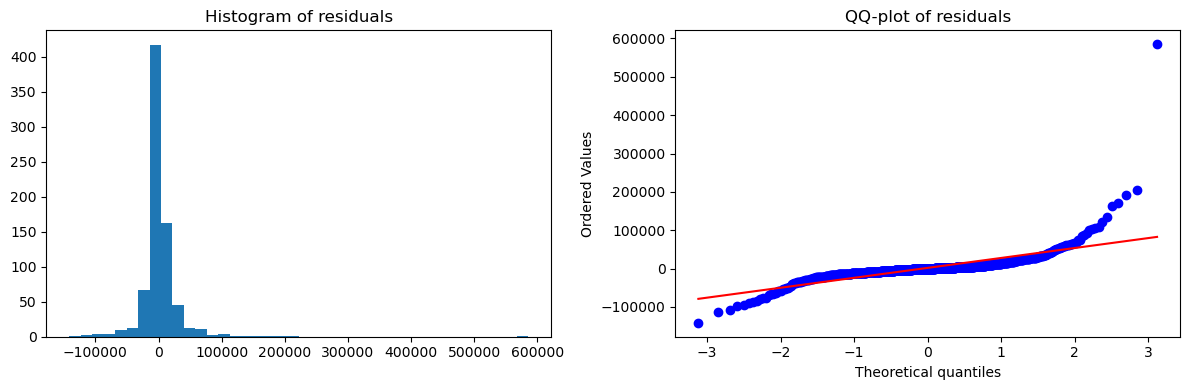

In [ ]:
import joblib
best_model = joblib.load("../models/catboost_price_pipe.joblib")

y_pred = best_model.predict(X_test)

# 1) build a small "residuals" table
df_resid = pd.DataFrame({
    "y_true"   : y_test,
    "y_pred"   : y_pred,
    "residual" : y_test - y_pred
}).reset_index(drop=True)

# 2) first, how are they distributed?
import matplotlib.pyplot as plt, scipy.stats as stats

fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].hist(df_resid["residual"], bins=40)
axes[0].set_title("Histogram of residuals")

stats.probplot(df_resid["residual"], dist="norm", plot=axes[1])
axes[1].set_title("QQ-plot of residuals")

plt.tight_layout()

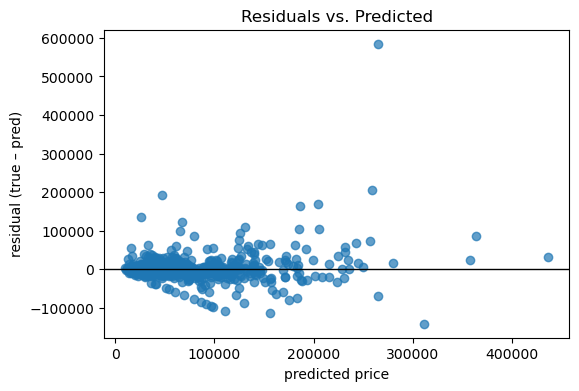

In [23]:
plt.figure(figsize=(6,4))
plt.scatter(df_resid["y_pred"], df_resid["residual"], alpha=0.7)
plt.axhline(0, color="black", lw=1)
plt.xlabel("predicted price")
plt.ylabel("residual (true – pred)")
plt.title("Residuals vs. Predicted")
plt.show()

In [ ]:
# 3) tag the "outliers" where absolute-resid > 3×std
rstd = df_resid["residual"].std()
outliers = df_resid[np.abs(df_resid["residual"]) > 3*rstd]

print("Top 10 worst predictions:")
display(outliers.sort_values("residual").head(5))
display(outliers.sort_values("residual", ascending=False).head(5))

Top 10 worst predictions:


,y_true,y_pred,residual
689,170000,311380.295659,-141380.295659
370,43000,156241.575173,-113241.575173
376,2450,110211.698313,-107761.698313
12,290000,185694.499717,104305.500283
707,310000,205012.133985,104987.866015


,y_true,y_pred,residual
422,850000,265021.943411,584978.056589
440,465000,259370.083338,205629.916662
60,240000,47407.479808,192592.520192
396,375000,204672.130132,170327.869868
608,349000,185877.491929,163122.508071


In [29]:
bad_idx = outliers.index
print("Features for the biggest under-predictions:")
display(X_test.iloc[bad_idx].reset_index(drop=True))
display(y_test.iloc[bad_idx].reset_index(drop=True))

Features for the biggest under-predictions:


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Mileage_per_Year,Unnatural_High_Mileage_Flag
0,Range Rover,Riyadh,Land Rover,Automatic,Other,Full,2018,3.8,50000,False,12500.000000,False
1,LX,Aseer,Lexus,Automatic,Gulf Arabic,Semi Full,2014,2.4,168000,False,21000.000000,False
2,S,Taef,Mercedes,Automatic,Gulf Arabic,Full,2015,1.8,113,False,16.142857,False
3,City,Riyadh,Honda,Automatic,Gulf Arabic,Full,2016,4.0,51000,False,8500.000000,False
4,G,Riyadh,Mercedes,Automatic,Saudi,Full,2015,8.8,213000,False,30428.571429,False
5,Land Cruiser 70,Taef,Toyota,Manual,Saudi,Full,2020,4.0,45000,False,22500.000000,False
6,Explorer,Riyadh,Ford,Automatic,Saudi,Standard,2010,6.0,35000,False,2916.666667,False
7,Range Rover,Dammam,Land Rover,Automatic,Saudi,Full,2019,3.5,38000,False,12666.666667,False
8,Bentayga,Dammam,Bentley,Automatic,Saudi,Full,2019,6.0,13000,False,4333.333333,False
9,X,Dammam,BMW,Automatic,Gulf Arabic,Full,2020,3.0,2300,False,1150.000000,False


0     290000
1     190000
2     240000
3      43000
4     240000
5       2450
6     160000
7     375000
8     850000
9     465000
10    349000
11    170000
12    310000
Name: Price, dtype: int64

### Conclusion

The tuned CatBoost model significantly enhances the accuracy of used-car pricing predictions on the syarah.com platform. It reduces the average absolute pricing error, particularly for mid-to-high-priced vehicles. However, substantial inaccuracies remain within the lowest and highest price segments (below 10,000 SAR and above 300,000 SAR), highlighting areas for targeted improvement.

### Actionable Recommendations

1. **Deploy Segment-Specific Models:**

   * Use the tuned CatBoost model specifically for mid-priced segments (10,000–300,000 SAR).
   * Develop separate models for extreme price segments (below 10,000 SAR and above 300,000 SAR) to ensure accurate pricing across all segments.

2. **Introduce Threshold-based Moderation:**

   * Implement automatic moderation rules that flag listings with predicted prices deviating significantly (±5%) from actual values, enabling prompt manual review and correction before listings go live.

3. **Continuous Model Improvement (Technical):**

   * Further refine the model by integrating additional features tailored to low-priced and high-priced vehicles, such as vehicle condition and detailed history.
   * Utilize regular model retraining cycles to maintain predictive accuracy amid changing market conditions.

### Projected Business Impact

Implementing the tuned CatBoost model, with targeted segmentation and moderation strategies, will significantly improve marketplace profitability and operational efficiency. Key estimated impacts include:

* **Revenue Gains from Correcting Underpricing:**

  * Assuming approximately 10% (100 listings/year) are significantly underpriced by an average of \~13,000 SAR per vehicle, the potential incremental revenue recovery is approximately **1,300,000 SAR annually**.

* **Inventory Efficiency from Overpricing Correction:**

  * Correcting an average overpricing error of approximately 6% (around 4,694 SAR per vehicle) on about 15% (150 listings/year) saves roughly **450 total listing days annually** (3 days saved per listing), significantly reducing operational costs.

* **Operational Cost Savings:**

  * At 20 SAR/day per listing, saving 450 days annually equates to approximately **9,000 SAR in direct operational savings per year**.

* **Enhanced Customer Trust & Satisfaction:**

  * Improved pricing accuracy leads to increased seller confidence, fewer price disputes, and higher buyer satisfaction, driving customer loyalty and repeat transactions.

Overall, strategic deployment and continuous improvement of this predictive pricing model positions syarah.com for substantial financial gains, improved customer satisfaction, and enhanced marketplace competitiveness.

In [62]:
# Filter the bands to exclude 0-10k and 300k+
filtered_bands = band_tbl[(band_tbl.index != "0–10k") & (band_tbl.index != "300k+")]

# Calculate global metrics on the filtered data
filtered_global_mae = (filtered_bands["MAE_mean"] * filtered_bands["count"]).sum() / filtered_bands["count"].sum()
filtered_global_mape = (filtered_bands["MAPE_mean"] * filtered_bands["count"]).sum() / filtered_bands["count"].sum()
filtered_global_mae_sd = (filtered_bands["MAE_sd"] * filtered_bands["count"]).sum() / filtered_bands["count"].sum()
filtered_global_mape_sd = (filtered_bands["MAPE_sd"] * filtered_bands["count"]).sum() / filtered_bands["count"].sum()

# Calculate metrics for all bands for comparison
global_mae = (band_tbl["MAE_mean"] * band_tbl["count"]).sum() / band_tbl["count"].sum()
global_mape = (band_tbl["MAPE_mean"] * band_tbl["count"]).sum() / band_tbl["count"].sum()
global_mae_sd = (band_tbl["MAE_sd"] * band_tbl["count"]).sum() / band_tbl["count"].sum()

# Print results
print(f"All price bands:")
print(f"  Global MAE : {global_mae:,.2f}")
print(f"  Global MAPE: {global_mape:.4f}")
print(f"  Global MAE SD: {global_mae_sd:,.2f}")

print(f"\nExcluding extreme price bands (0-10k and 300k+):")
print(f"  Global MAE : {filtered_global_mae:,.2f}")
print(f"  Global MAPE: {filtered_global_mape:.4f}")
print(f"  Global MAE SD: {filtered_global_mae_sd:,.2f}")
print(f"  Global MAPE SD: {filtered_global_mape_sd:.4f}")

display(band_tbl)

All price bands:
  Global MAE : 15,492.51
  Global MAPE: 0.9599
  Global MAE SD: 17,404.92

Excluding extreme price bands (0-10k and 300k+):
  Global MAE : 12,803.69
  Global MAPE: 0.1980
  Global MAE SD: 14,825.59
  Global MAPE SD: 0.2289


,count,MAE_mean,MAE_sd,MAPE_mean,MAPE_sd
price_band,,,,,
0–10k,29.0,35660.209285,34018.586444,20.149606,22.697918
10k–35k,186.0,5884.587247,6340.528951,0.254640,0.267460
35k–60k,213.0,9125.680172,12715.888890,0.197333,0.289260
60k–95k,172.0,12296.447140,12631.741045,0.162573,0.161736
95k–300k,151.0,27092.513947,30752.276902,0.169522,0.172573
300k+,10.0,151139.584254,155452.946756,0.315211,0.189022
